## Introducción del EDA de la Divisa EUR/USD

El análisis exploratorio de datos (EDA) es una etapa crucial para comprender los detalles en las series temporales de trading, especialmente en el contexto de divisas. En este estudio, nos enfocamos en la divisa EUR/USD, que representa el valor del euro en términos de dólares estadounidenses. Este par de divisas es de gran relevancia en los mercados internacionales debido a su alta liquidez y la estabilidad económica de las economías involucradas.

### Objetivo del EDA

El objetivo principal de este EDA es analizar en profundidad cómo varía el precio del bid de la divisa EUR/USD en una fecha específica: el 26 de septiembre de 2022. Queremos entender los movimientos del precio durante ese día para obtener información valiosa sobre el comportamiento en una fecha concreta. Los aspectos clave que abordaremos incluyen:

1. **Variaciones del Precio a lo Largo del Día**: Examinar las fluctuaciones en el precio de la divisa EUR/USD durante el día seleccionado para identificar patrones de comportamiento intradía y cambios significativos en el precio.

2. **Análisis de Tendencias y Volatilidad**: Evaluar la volatilidad y las tendencias del precio a lo largo del día para comprender mejor cómo varía el precio en diferentes momentos.

3. **Visualización de Datos**: Utilizar herramientas gráficas para representar las variaciones del precio y otros indicadores relevantes, facilitando la interpretación y el análisis de los datos.

4. **Detección de Anomalías**: Identificar cualquier anomalía o evento atípico en el comportamiento del precio que pueda haber ocurrido durante el día.


En el siguiente análisis, exploraremos el conjunto de datos de EUR/USD para el 26 de septiembre de 2022 con el objetivo de obtener una visión clara de los movimientos de precios durante ese día.

---


### Librerias usadas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot

## Base de datos

In [ ]:
dftra = pd.read_csv("/content/26-09-2022.txt", sep=",", header=0)
print(dftra.head())

                         fecha   hora_exacta  precio_bid   volumen_bid  \
26/09/2022  00:00:00.033000000        0.9687          14        0.9688   
26/09/2022  00:00:00.045000000        0.9687           4        0.9688   
26/09/2022  00:00:00.045000000        0.9687           3        0.9688   
26/09/2022  00:00:00.045000000        0.9687           3        0.9688   
26/09/2022  00:00:00.045000000        0.9687           1        0.9688   

             precio_ask  volumen_ask   instrumento_EUR/USD  
26/09/2022            8            E                   NaN  
26/09/2022            8            E                   NaN  
26/09/2022            8            E                   NaN  
26/09/2022           18            E                   NaN  
26/09/2022           18            E                   NaN  


In [ ]:
print(f"El DataFrame filtrado tiene {dftra.shape[0]} filas.")

El DataFrame filtrado tiene 1223313 filas.


## Descripción del DataFrame de Trading

Este DataFrame contiene registros de transacciones para la divisa en comercio de trading EUR/USD, toda la información corresponde al 26 de septiembre de 2022, con las siguientes columnas:

- **fecha**: Fecha de la transacción. Todos los registros corresponden al 26 de septiembre de 2022, incluyendo la hora, minutos y segundos.

- **hora_exacta**: Hora exacta de la transacción con precisión en nanosegundos. Los registros tienen marcas de tiempo en la misma fracción de segundo (ej. 00:00:00.033 y 00:00:00.045).

- **precio_bid**: Precio de oferta (bid price) en cada transacción.

- **volumen_bid**: Volumen asociado al precio de oferta. Varía entre transacciones.

- **precio_ask**: Precio de demanda (ask price).

- **volumen_ask**: Volumen asociado al precio de demanda.

- **instrumento_EUR/USD**: Relacionado con el instrumento EUR/USD.



In [ ]:
num_filas = dftra.shape[0]
print("Número de filas:", num_filas)

nombres_columnas = dftra.columns
print("Nombres de las columnas:", nombres_columnas)

resumen_dftra = dftra.describe(include='all')
print("Resumen del DataFrame:")
print(resumen_dftra)

Número de filas: 1223313
Nombres de las columnas: Index(['fecha', ' hora_exacta', 'precio_bid', ' volumen_bid', ' precio_ask',
       ' volumen_ask', ' instrumento_EUR/USD'],
      dtype='object')
Resumen del DataFrame:
                     fecha   hora_exacta    precio_bid   volumen_bid  \
count              1223313  1.223313e+06  1.223313e+06  1.223313e+06   
unique              500630           NaN           NaN           NaN   
top     05:14:18.132000000           NaN           NaN           NaN   
freq                    45           NaN           NaN           NaN   
mean                   NaN  9.704096e-01  1.862888e+01  9.705178e-01   
std                    NaN  2.460179e-03  1.206868e+01  2.460008e-03   
min                    NaN  9.642000e-01  1.000000e+00  9.643000e-01   
25%                    NaN  9.684000e-01  7.000000e+00  9.685000e-01   
50%                    NaN  9.703000e-01  1.800000e+01  9.704000e-01   
75%                    NaN  9.723000e-01  2.900000e+01  9.72

In [ ]:
print(dftra[' volumen_ask'])

26/09/2022    E
26/09/2022    E
26/09/2022    E
26/09/2022    E
26/09/2022    E
             ..
26/09/2022    E
26/09/2022    E
26/09/2022    E
26/09/2022    E
26/09/2022    E
Name:  volumen_ask, Length: 1223313, dtype: object


## Análisis del DataFrame

###**Número de filas:** 1,223,313

### **Columnas:**
- **'fecha'**: Columna que corresponde tiempos específicos (por ejemplo, 05:14:18.132000000).
- **hora_exacta**: Hora exacta con precisión en nanosegundos de la divisa EUR/USD.
- **precio_bid**: Precio de oferta con una media de 0.9687 y baja desviación estándar, indicando concentracion en los precios.
- **volumen_bid**: Volumen asociado al precio de oferta (mínimo 1, máximo 489).
- **precio_ask**: Precio de demanda con media de 18.39(mínimo 1, máximo 252).
- **volumen_ask**: Columna con un solo valor ('E'), probablemente indicando un error o falta de datos.
- **instrumento_EUR/USD**: Columna vacía.





## Conversión de Fecha

Para realizar gráficos de frecuencia con las fechas en la divisa EUR/USD.


In [ ]:
dftra['fechac'] = dftra['fecha']
dftra['hora'] = pd.to_datetime(dftra['fecha']).dt.hour
dftra['INTERVALO_HORAS'] = (dftra['hora'] // 2) * 2
dftra['INTERVALO_HORAS'] = dftra['INTERVALO_HORAS'].apply(lambda x: f"{x:02d}:00 - {x+2:02d}:00")

dftra['fecha'] = dftra['fechac']

<ipython-input-50-51b35664edf7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dftra['hora'] = pd.to_datetime(dftra['fecha']).dt.hour


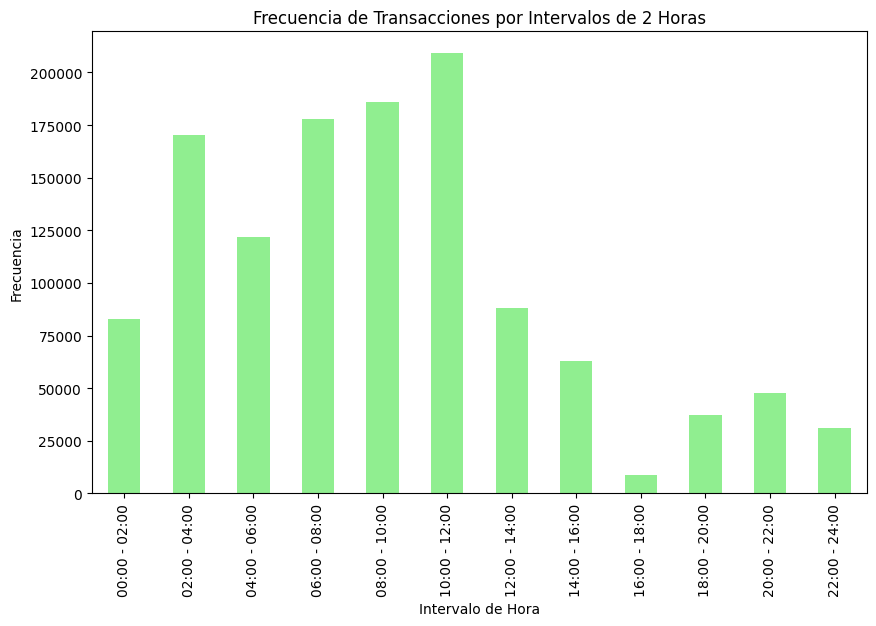

In [ ]:
frecuencia_transacciones_intervalos = dftra.groupby('INTERVALO_HORAS').size()

#Graficar la frecuencia de transacciones por intervalos de 2 horas
plt.figure(figsize=(10, 6))
frecuencia_transacciones_intervalos.plot(kind='bar', color='lightgreen')
plt.title('Frecuencia de Transacciones por Intervalos de 2 Horas')
plt.xlabel('Intervalo de Hora')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

### Análisis de Intervalos de Hora

Observamos que la frecuencia de los datos en el DataFrame se distribuye como se muestra en el gráfico. Se puede ver que la mayor cantidad de registros se tomó entre las 06:00 y las 12:00 horas, mientras que el período con menos registros fue entre las 16:00 y las 24:00 horas.


<Figure size 1000x600 with 0 Axes>

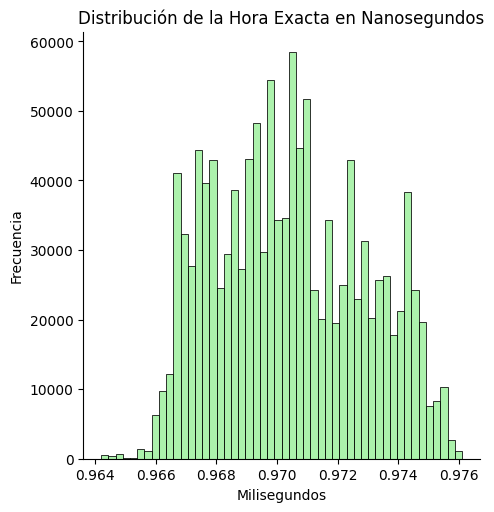

In [ ]:
# Graficar la distribución de los milisegundos
plt.figure(figsize=(10, 6))
sns.displot(dftra[' hora_exacta'], bins=50, color='lightgreen', edgecolor='black') # Use line_kws to change the color of the KDE line
plt.title('Distribución de la Hora Exacta en Nanosegundos')
plt.xlabel('Milisegundos')
plt.ylabel('Frecuencia')
plt.show()



### Análisis de Hora Exacta

En esta gráfica se presenta la distribución de la frecuencia con respecto a la hora exacta dada en nanosegundos. Se aprecia un pico entre 0.970 y 0.972, en este intervalo es donde hay más datos. Además, se observa una distribución que parece casi normal.


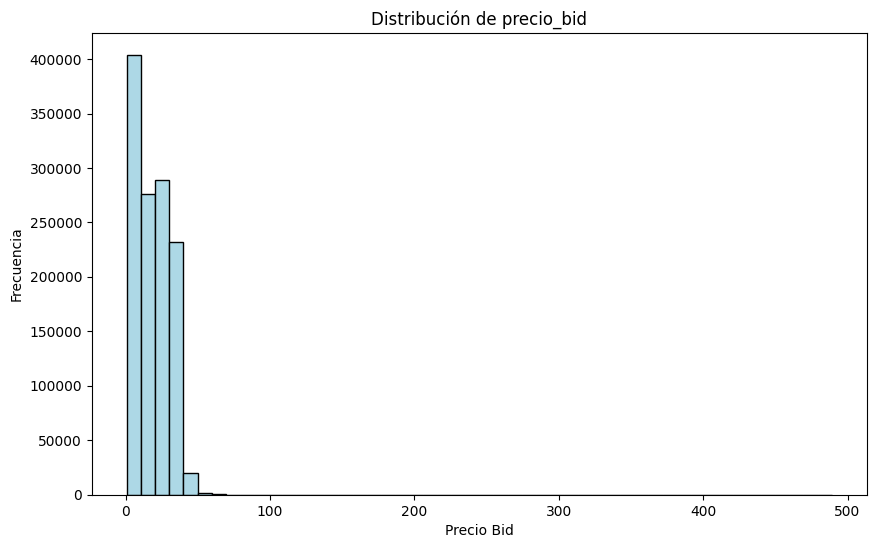

In [ ]:
# Histograma para precio_bid
plt.figure(figsize=(10, 6))
plt.hist(dftra['precio_bid'], bins=50, color='lightblue', edgecolor='black')
plt.title('Distribución de precio_bid')
plt.xlabel('Precio Bid')
plt.ylabel('Frecuencia')
plt.show()


### Análisis de Precio Bid

Aquí podemos ver la distribución del precio bid y la concentración de datos con respecto al precio. Se observa una mayor concentración en los precios más bajos, seguida de otra concentración, menos pronunciada, alrededor de los 36-40. A medida que el precio aumenta, la frecuencia disminuye considerablemente.


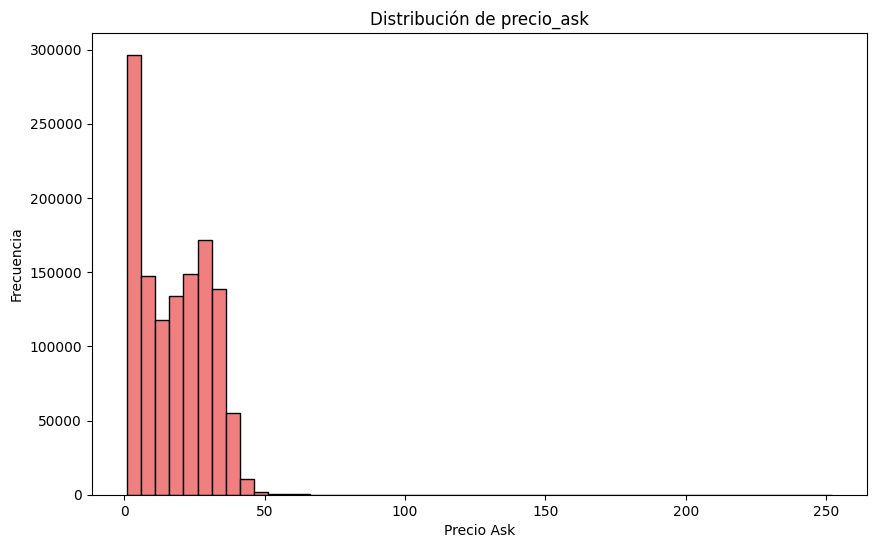

In [ ]:
# Histograma para precio_ask
plt.figure(figsize=(10, 6))
plt.hist(dftra[' precio_ask'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribución de precio_ask')
plt.xlabel('Precio Ask')
plt.ylabel('Frecuencia')
plt.show()

### Análisis de Precio Ask

Observamos un comportamiento casi idéntico al del precio bid. Al principio, se presenta la mayor frecuencia, seguida de un segundo pico importante entre los 34 y 38.


<Figure size 1000x600 with 0 Axes>

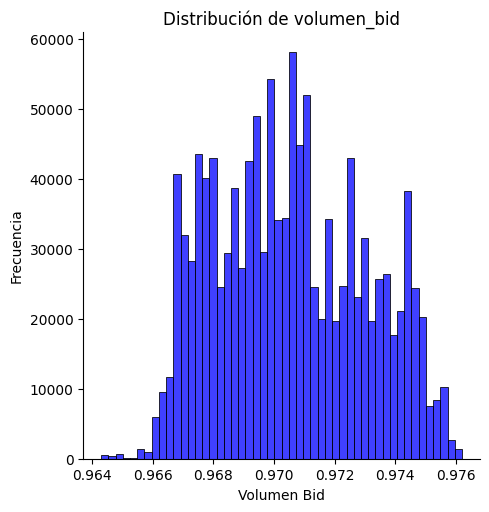

In [ ]:
# Histograma para volumen_bid
plt.figure(figsize=(10, 6))
sns.displot(dftra[' volumen_bid'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de volumen_bid')
plt.xlabel('Volumen Bid')
plt.ylabel('Frecuencia')
plt.show()

### Análisis del Volumen Bid

En esta gráfica se observa una distribución que parece casi normal, con un pico entre 0.970 y 0.972. A ambos lados del pico, se nota una disminución progresiva.


## Analisis de los NA'S

In [ ]:
total_na = dftra.isna().sum().sum()
print(f"Total NA en el DataFrame: {total_na}")

Total NA en el DataFrame: 1223313


In [ ]:
dftra.isnull().sum()

fecha                         0
 hora_exacta                  0
precio_bid                    0
 volumen_bid                  0
 precio_ask                   0
 volumen_ask                  0
 instrumento_EUR/USD    1223313
fechac                        0
hora                          0
INTERVALO_HORAS               0
dtype: int64

### Análisis de NA'S

- **instrumento_EUR/USD**: 1,223,313 valores faltantes. Esta columna está completamente vacía y no contiene información.



# Matriz de correlación:






In [ ]:
dftra[' volumen_ask'] = pd.to_numeric(dftra[' volumen_ask'], errors='coerce')

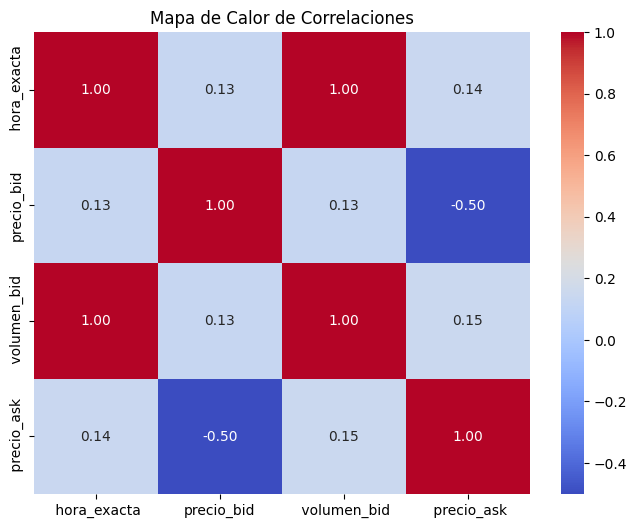

In [ ]:
df_numeric = dftra[[' hora_exacta', 'precio_bid', ' volumen_bid', ' precio_ask']]

correlation_matrix = df_numeric.corr()
# Graficar el mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()


## Análisis de la Matriz de Correlación

Observamos una alta correlación entre `volumen_bid` y `hora_exacta`, así como una alta correlación entre otras variables en el DataFrame. También se destaca una correlación negativa de -0.50 entre `precio_bid` y `precio_ask`.


In [ ]:
dftra.set_index('fechac', inplace=True)  # Establece la columna 'fecha' como índice

In [ ]:
# Convertir columnas a numéricas
dftra['precio_bid'] = pd.to_numeric(dftra['precio_bid'], errors='coerce')

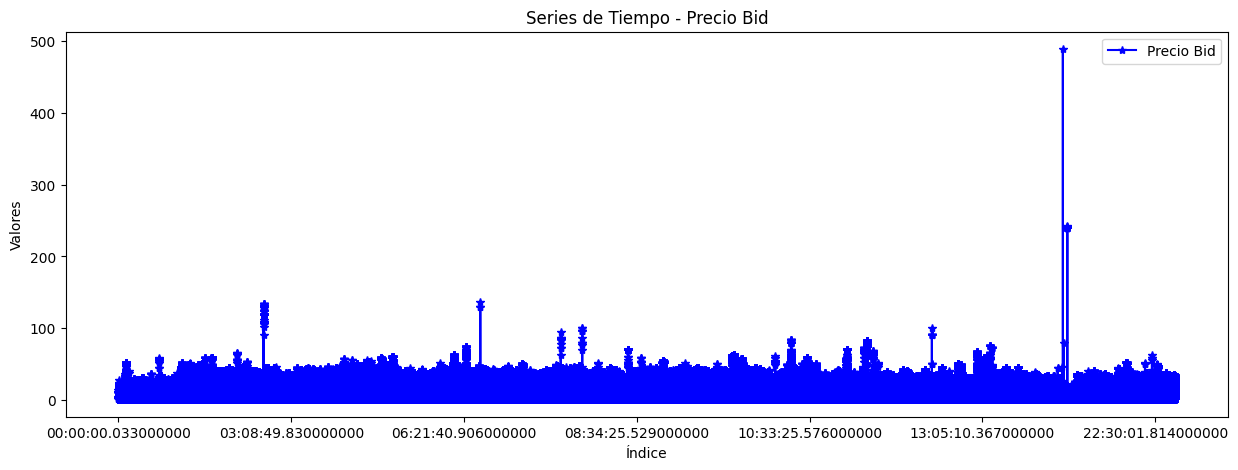

In [ ]:
plt.rcParams.update({'figure.figsize': (7, 4)})

# Graficar la serie precio_bid
plt.figure(figsize=(15, 5))
dftra['precio_bid'].plot(linestyle='-', marker='*', color='b')


plt.legend(['Precio Bid'], loc='best')
plt.title('Series de Tiempo - Precio Bid')
plt.ylabel('Valores')
plt.xlabel('Índice')
plt.show()



Precio Bid - Mean1 = 8.68, Mean2 = 18.63
Precio Bid - Variance1 = 36.87, Variance2 = 145.65


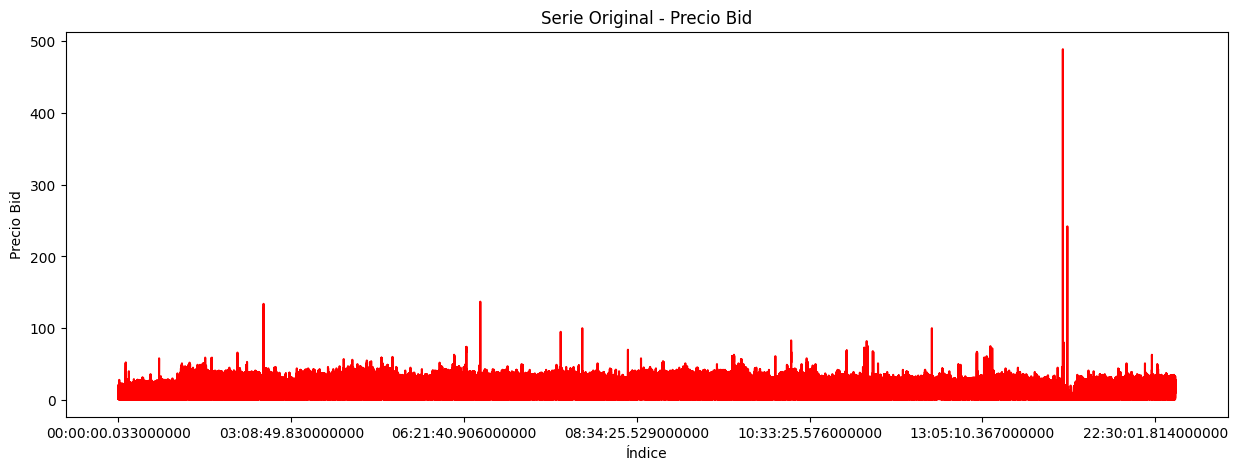

In [ ]:
plt.rcParams.update({'figure.figsize': (15, 5)})

# Cálculo de medias y varianzas para las primeras y las siguientes 100 observaciones
Mean1, Mean2 = dftra['precio_bid'].iloc[:100].mean(), dftra['precio_bid'].iloc[100:].mean()
Var1, Var2 = dftra['precio_bid'].iloc[:100].var(), dftra['precio_bid'].iloc[100:].var()

print(f'Precio Bid - Mean1 = {Mean1:.2f}, Mean2 = {Mean2:.2f}')
print(f'Precio Bid - Variance1 = {Var1:.2f}, Variance2 = {Var2:.2f}')
dftra['precio_bid'].plot(color='r')
plt.title(f'Serie Original - Precio Bid')
plt.xlabel('Índice')
plt.ylabel('Precio Bid')
plt.show()


### Análisis de la Serie de Tiempo de "precio_bid"

Se observa un comportamiento en la serie de tiempo con algunos picos leves a lo largo del día. Sin embargo, se aprecia un pico notable en el intervalo de tiempo entre 13:05:10 y 22:30:01. Esta serie se puede observar tanto en la gráfica anterior como en esta.

Además, se realiza un análisis de la media de las primeras 100 observaciones frente a las siguientes 100 para evaluar si la serie de tiempo es estacionaria. Según los resultados, parece que la serie no presenta una estacionalidad clara.


# Gráfica Q-Q

Para evaluar la normalidad de **precio_bid**.


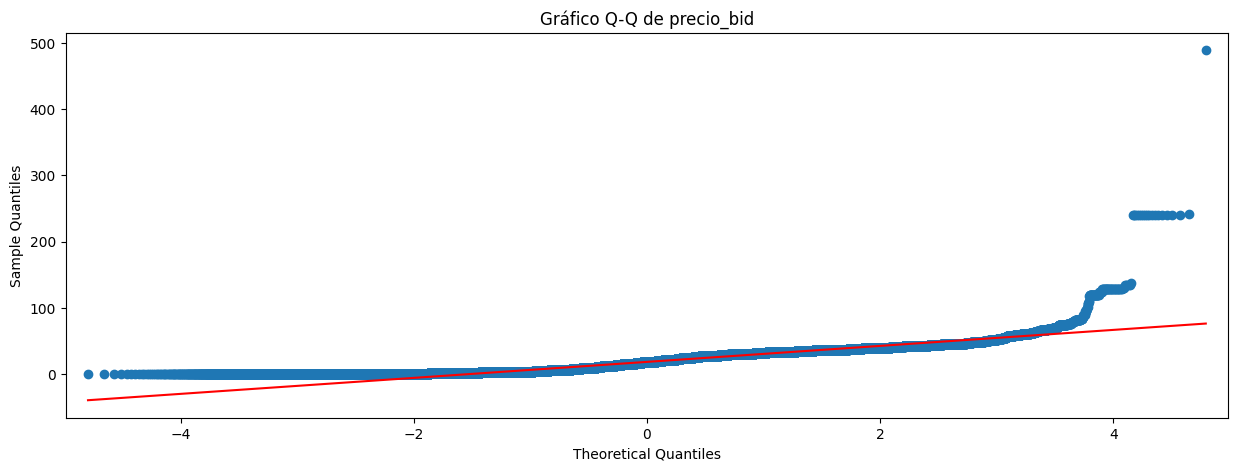

In [ ]:
# Crear el gráfico Q-Q para la serie 'precio_bid'
qqplot(dftra["precio_bid"], line='s')
plt.title('Gráfico Q-Q de precio_bid')
plt.show()

Se observa una casi normalidad en la gráfica. Sin embargo, al inicio hay una ligera desviación respecto a la línea de normalidad. Al final, se presentan desvíos significativos, lo que coincide con los picos observados en la serie de tiempo. Esto sugiere que la distribución probablemente no es completamente normal.

# Test de Kolmogorov-Smirnov (KS)

**Planteamiento de Hipótesis:**
- **Hipótesis Nula (H0)**: La serie de datos sigue una distribución normal.
- **Hipótesis Alternativa (H1)**: La serie de datos no sigue una distribución normal.



In [ ]:
from scipy.stats import kstest

# Kolmogorov-Smirnov
ks_stat, ks_p_value = kstest(dftra["precio_bid"], 'norm')

# Imprimir los resultados
print(f'Estadístico de KS: {ks_stat}')
print(f'Valor p: {ks_p_value}')

# Interpretación
if ks_p_value < 0.05:
    print("La serie no sigue una distribución normal (rechazamos la hipótesis nula)")
else:
    print("La serie sigue una distribución normal (no rechazamos la hipótesis nula)")


Estadístico de KS: 0.9462561648867273
Valor p: 0.0
La serie no sigue una distribución normal (rechazamos la hipótesis nula)


Dado que el valor p-valor es 0.0, rechazamos la hipótesis nula, concluyendo que la serie de tiempo **precio_bid** no sigue una distribución normal. Esto es consistente con las observaciones realizadas en la gráfica Q-Q, donde se notan desviaciones significativas respecto a la normalidad, particularmente en los valores extremos.

## Referencia al caso de estudio

En el escrito del profesor **Lihki Rubio**, se presenta un caso utilizando la técnica de **Remuestreo de datos de series temporales**. Esta técnica se muestra con una serie temporal sobre concentraciones químicas tomadas cada dos horas entre el 1 de enero de 1975 y el 17 de enero de 1975.

Este caso servirá como guía para desarrollar el análisis de nuestra propia serie de tiempo, que cuenta con una cantidad de datos muy grande. El remuestreo nos permitirá simplificar el conjunto de datos manteniendo las características de la serie.

**Créditos al escrito**: *Introducción a las series de tiempo — Análisis y Predicción de Series de Tiempo*.


## Resampleo

<ipython-input-66-b83bb35189f9>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dftra['fecha'] = pd.to_datetime(dftra['fecha'])


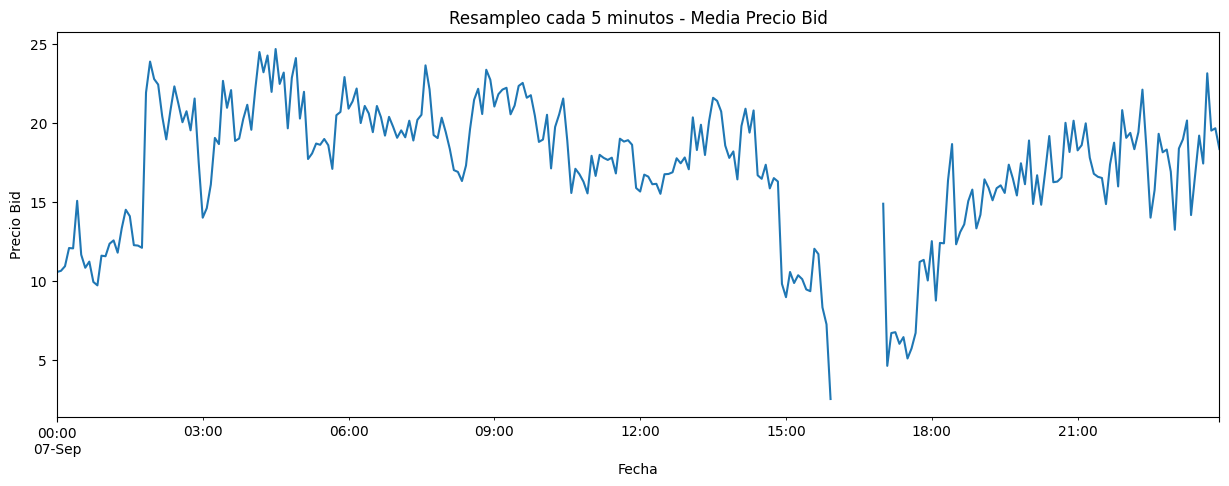

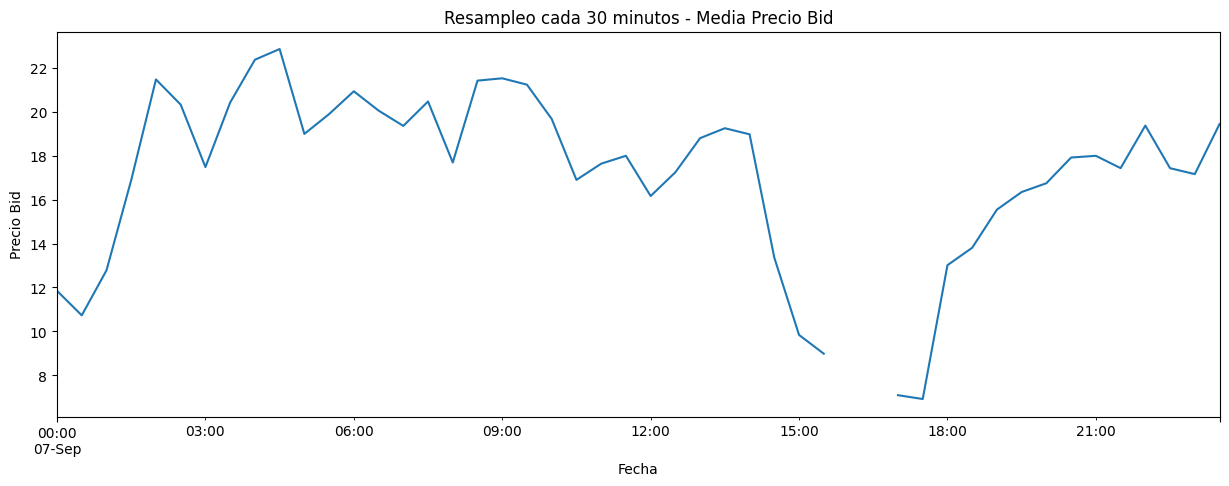

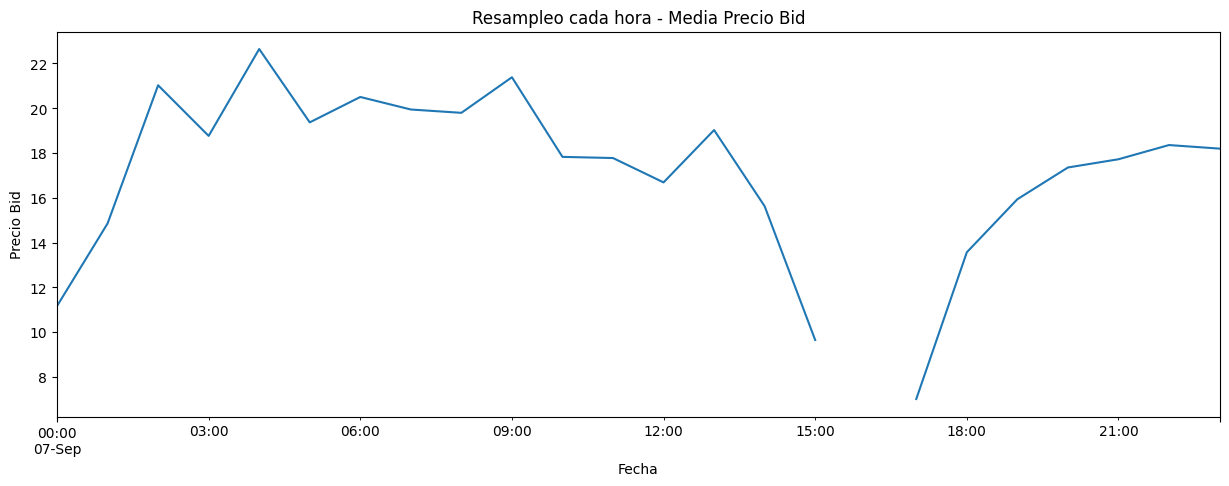

In [ ]:
dftra['fecha'] = pd.to_datetime(dftra['fecha'])
dftra = dftra.set_index('fecha')

non_numeric_cols = dftra.select_dtypes(exclude=['number', 'datetime']).columns

# Convertir columnas no numéricas a numéricas, manejando errores
for col in non_numeric_cols:
    dftra[col] = pd.to_numeric(dftra[col], errors='coerce')

# Resampleo cada 5 minutos: calculamos la media
df5min = dftra.resample('5T').mean()
# Resampleo cada 30 minutos: calculamos la media
df30min = dftra.resample('30T').mean()
# Resampleo cada hora: calculamos la media
dfhora = dftra.resample('H').mean()

# Graficamos las series resampleadas
def plot_resampled_data(df_resampled, title):
    df_resampled['precio_bid'].plot(color='tab:blue')
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel('Precio Bid')
    plt.show()

plot_resampled_data(df5min, 'Resampleo cada 5 minutos - Media Precio Bid')
plot_resampled_data(df30min, 'Resampleo cada 30 minutos - Media Precio Bid')
plot_resampled_data(dfhora, 'Resampleo cada hora - Media Precio Bid')



Después del resampleo, observamos las siguientes gráficas de la serie de tiempo en intervalos de "5 minutos", "30 minutos" y "1 hora". Lo primero que se puede notar es que, a medida que se amplía el intervalo, la serie se va suavizando. Al inicio, la serie parece mostrar una tendencia general, pero con el paso del tiempo se empiezan a visualizar sutilmente cambios cíclicos. Además, se observa una interrupción en la serie entre las 15:00 y las 17:00, lo cual también se refleja en la gráfica de frecuencia de transacciones en intervalos de 2 horas.


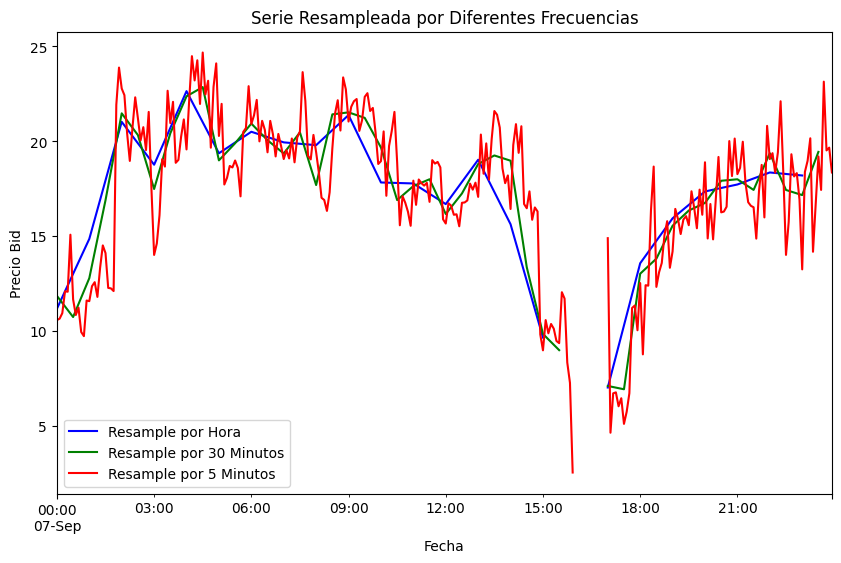

In [ ]:
df_hora = dftra['precio_bid'].resample('H').mean()
df_30min = dftra['precio_bid'].resample('30T').mean()
df_5min = dftra['precio_bid'].resample('5T').mean()

fig, ax = plt.subplots(figsize=(10, 6))

# Serie resampleada por hora en azul
df_hora.plot(ax=ax, color='b', label='Resample por Hora')

# Serie resampleada por 30 minutos en verde
df_30min.plot(ax=ax, color='g', label='Resample por 30 Minutos')

# Serie resampleada por 5 minutos en rojo
df_5min.plot(ax=ax, color='r', label='Resample por 5 Minutos')

ax.set_title('Serie Resampleada por Diferentes Frecuencias')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio Bid')
plt.legend()
plt.show()


### Análisis de la Gráfica:

En esta gráfica se observa el resampleo por hora, 30 minutos y 5 minutos de la serie de tiempo "precio_bid", todas sobrepuestas. Se pueden apreciar aspectos mencionados anteriormente, como la suavidad de la serie a medida que se amplía el intervalo de tiempo, así como la interrupción en el intervalo entre las 15:00 y las 17:00.


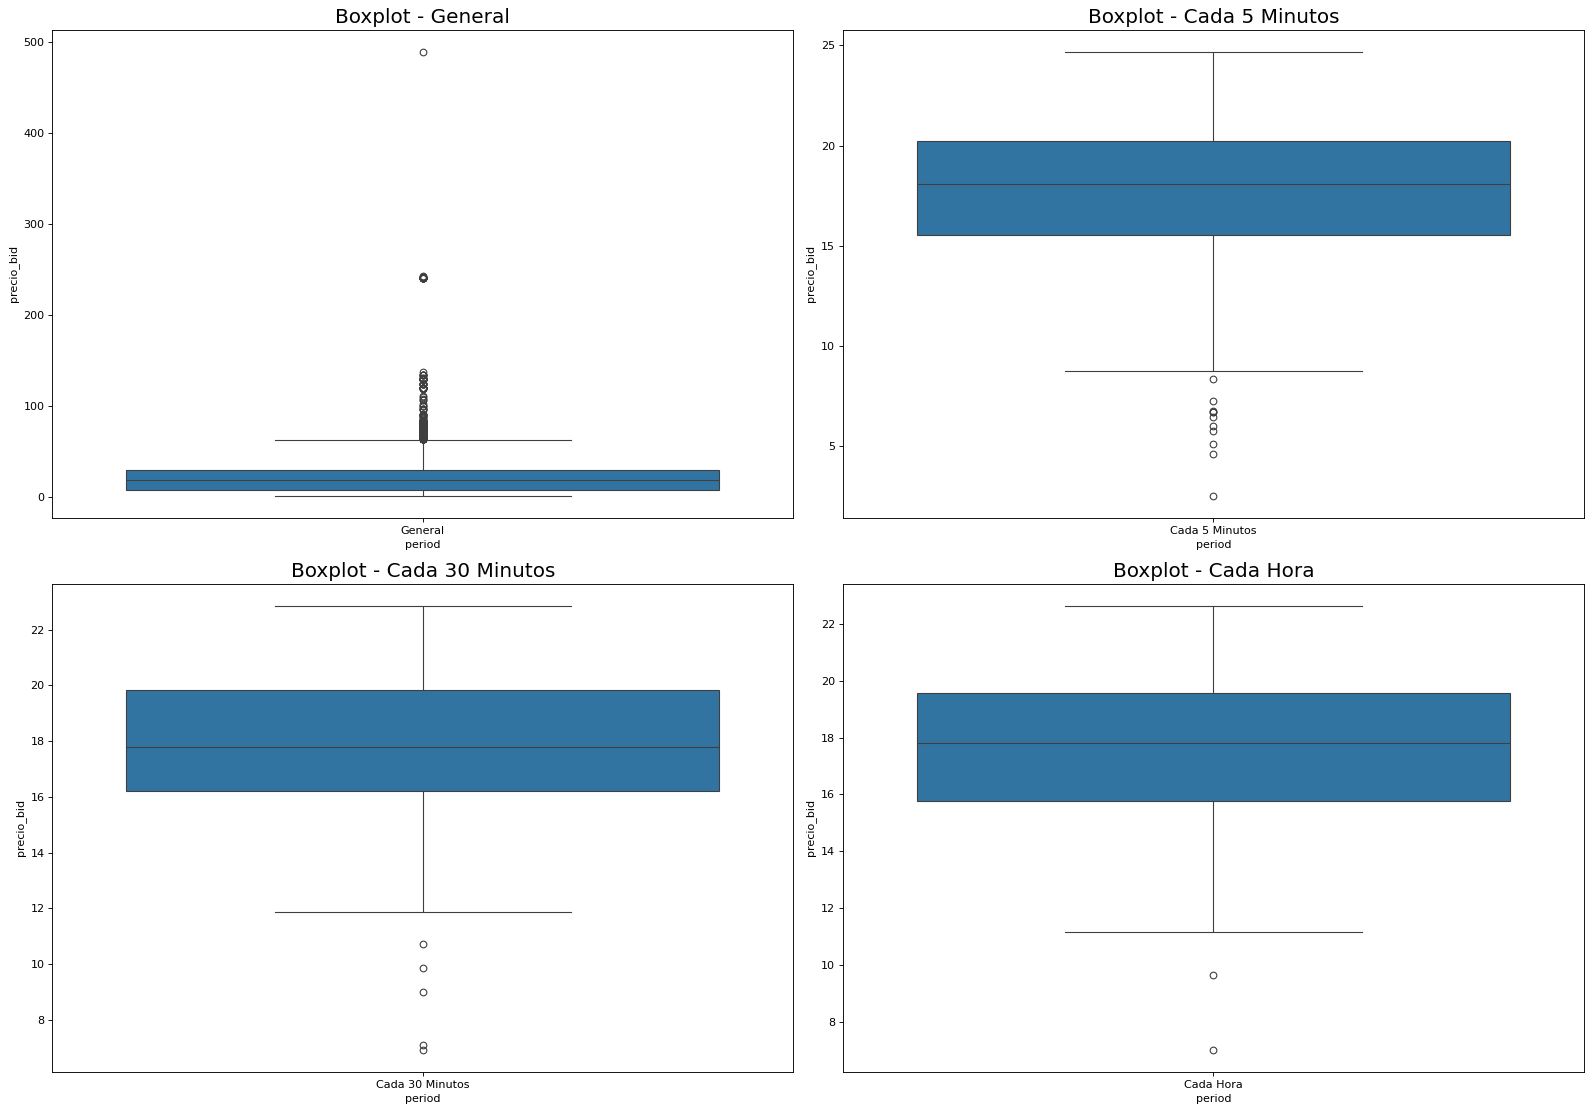

In [ ]:
# Identificar columnas no numéricas y convertirlas
non_numeric_cols = dftra.select_dtypes(exclude=['number', 'datetime']).columns
for col in non_numeric_cols:
    dftra[col] = pd.to_numeric(dftra[col], errors='coerce')

df5min = dftra.resample('5T').mean()
df30min = dftra.resample('30T').mean()
dfhora = dftra.resample('H').mean()

# Preparar los datos para el boxplot
def prepare_boxplot_data(df, period):
    df = df.reset_index()
    df['period'] = period
    return df

# Preparar datos para boxplots
dftra_boxplot = prepare_boxplot_data(dftra, 'General')
df5min_boxplot = prepare_boxplot_data(df5min, 'Cada 5 Minutos')
df30min_boxplot = prepare_boxplot_data(df30min, 'Cada 30 Minutos')
dfhora_boxplot = prepare_boxplot_data(dfhora, 'Cada Hora')

# Combinar todos los DataFrames para graficar
combined_df = pd.concat([dftra_boxplot, df5min_boxplot, df30min_boxplot, dfhora_boxplot])

fig, axes = plt.subplots(2, 2, figsize=(20, 14), dpi=80)

sns.boxplot(x='period', y='precio_bid', data=dftra_boxplot, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot - General', fontsize=18)

sns.boxplot(x='period', y='precio_bid', data=df5min_boxplot, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot - Cada 5 Minutos', fontsize=18)

sns.boxplot(x='period', y='precio_bid', data=df30min_boxplot, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot - Cada 30 Minutos', fontsize=18)

sns.boxplot(x='period', y='precio_bid', data=dfhora_boxplot, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot - Cada Hora', fontsize=18)

plt.tight_layout()
plt.show()



## Análisis de los Boxplot

En los gráficos se muestra la distribución del **precio_bid** en diferentes intervalos de tiempo: sin aplicar resampleo (general), cada 5 minutos, cada 30 minutos y cada 1 hora.

* **General**: Hay muchos valores atípicos altos, lo que indica transacciones con precios bid muy elevados. La mayoría de los datos están concentrados en precios bajos, con una distribución muy asimétrica.
* **Cada 5 Minutos**: La distribución es más detallada, con menor dispersión y algunos valores atípicos inferiores. La concentración principal se encuentra entre 15 y 20 unidades.
* **Cada 30 Minutos**: La distribución es similar a la de 5 minutos, pero con mayor suavidad y menos valores atípicos. Esto muestra que al aumentar el intervalo de resampleo, los valores atípicos impactan menos en la distribución.
* **Cada 1 Hora**: La distribución del precio bid es aún más suave, con menos valores atípicos visibles. El rango intercuartílico es similar al del boxplot de 30 minutos, lo que sugiere estabilidad en la mediana al aumentar el intervalo.

# Autocorrelación y Autocorrelación Parcial

Autocorrelación para datos resampleados cada 5 minutos:


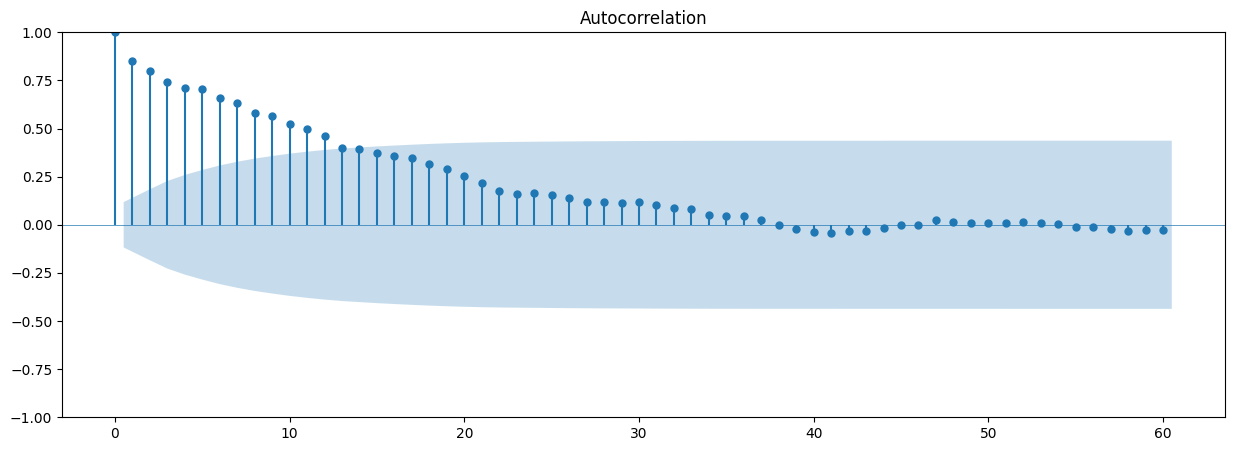

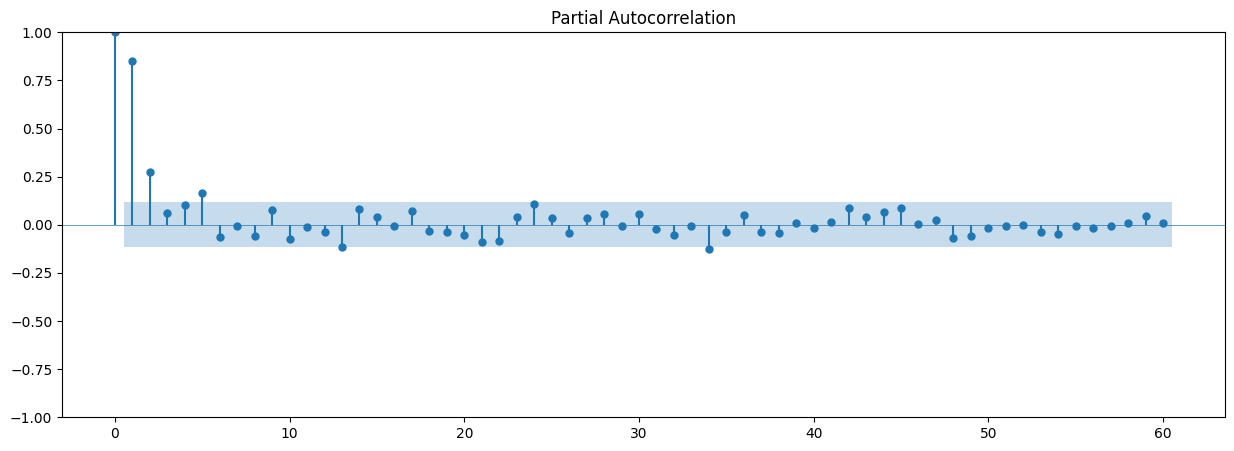

In [ ]:
df5min = dftra.resample('5T').mean()
# Número de lags
nlag = 60

# Autocorrelación y autocorrelación parcial para datos resampleados cada 5 minutos
print("Autocorrelación para datos resampleados cada 5 minutos:")
plot_acf(df5min['precio_bid'].dropna(), lags=nlag, linewidth=0.5)  # Autocorrelación
plt.show()

plot_pacf(df5min['precio_bid'].dropna(), lags=nlag, linewidth=0.5)  # Autocorrelación parcial
plt.show()

Autocorrelación para datos resampleados cada 30 minutos:


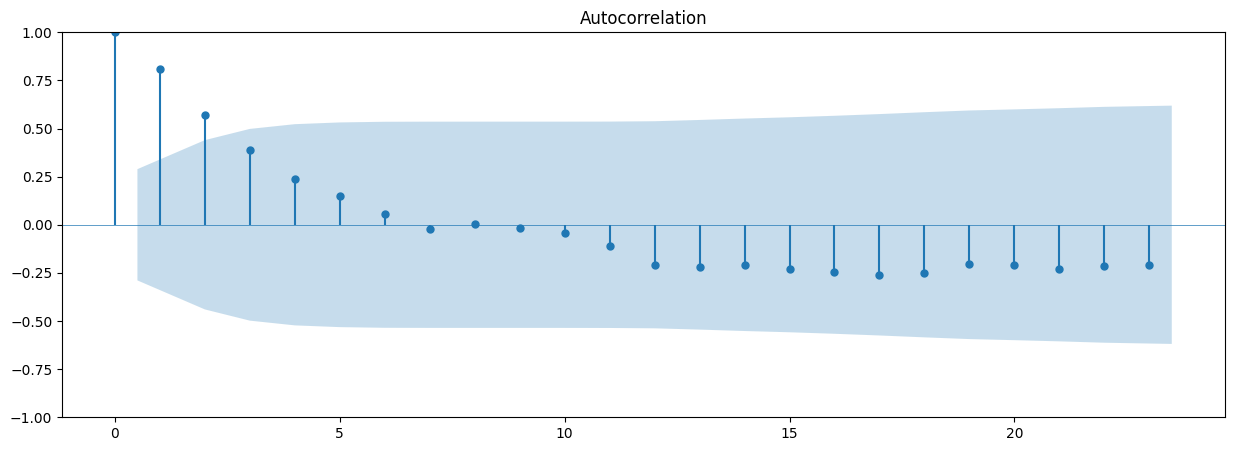

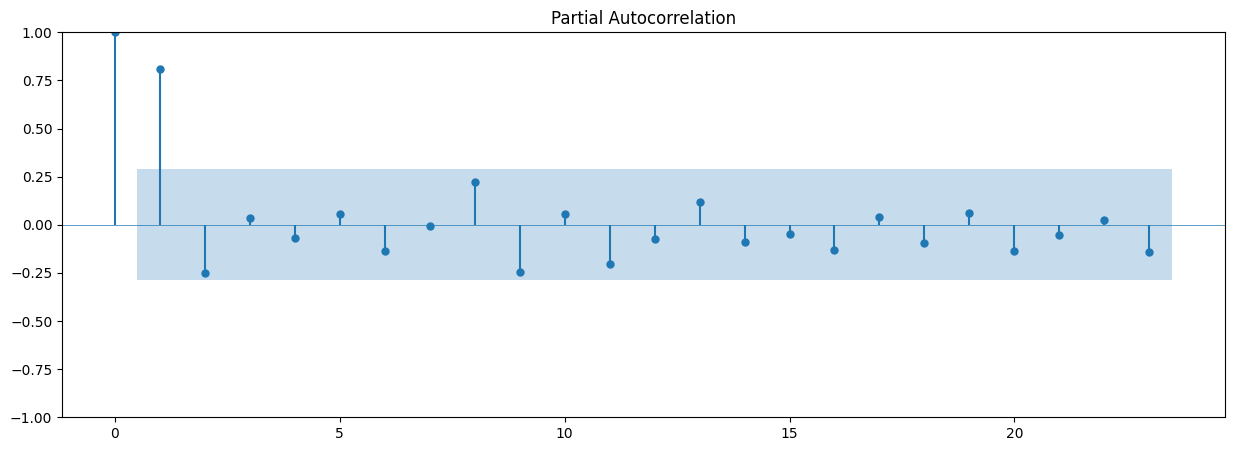

In [ ]:
# Resamplear los datos
df30min = dftra.resample('30T').mean()
# Número de lags
nlag = 23

# Autocorrelación y autocorrelación parcial para datos resampleados cada 30 minutos
print("Autocorrelación para datos resampleados cada 30 minutos:")
plot_acf(df30min['precio_bid'].dropna(), lags=nlag, linewidth=0.5)  # Autocorrelación
plt.show()

plot_pacf(df30min['precio_bid'].dropna(), lags=nlag, linewidth=0.5)  # Autocorrelación parcial
plt.show()

Autocorrelación para datos resampleados cada 1 hora:


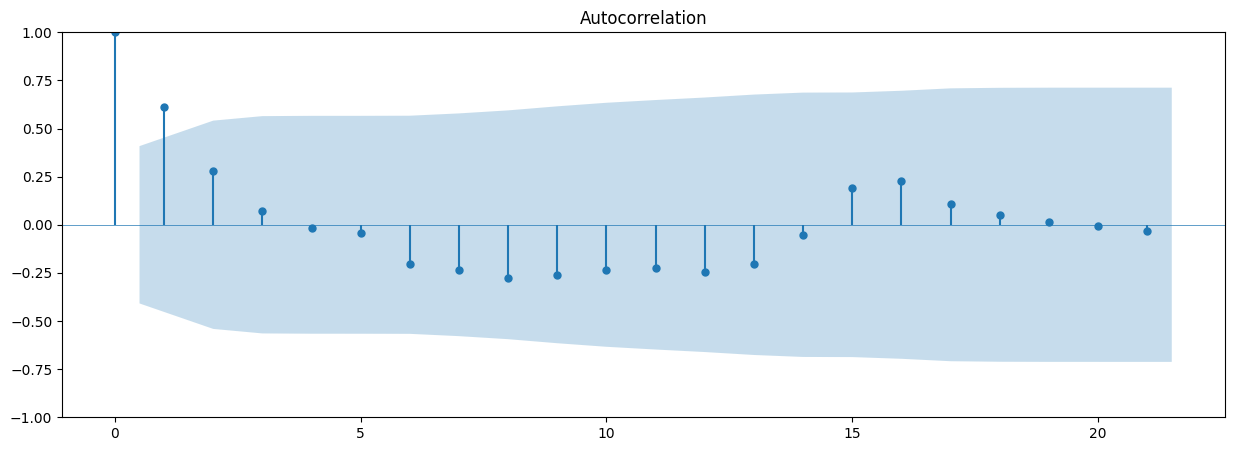

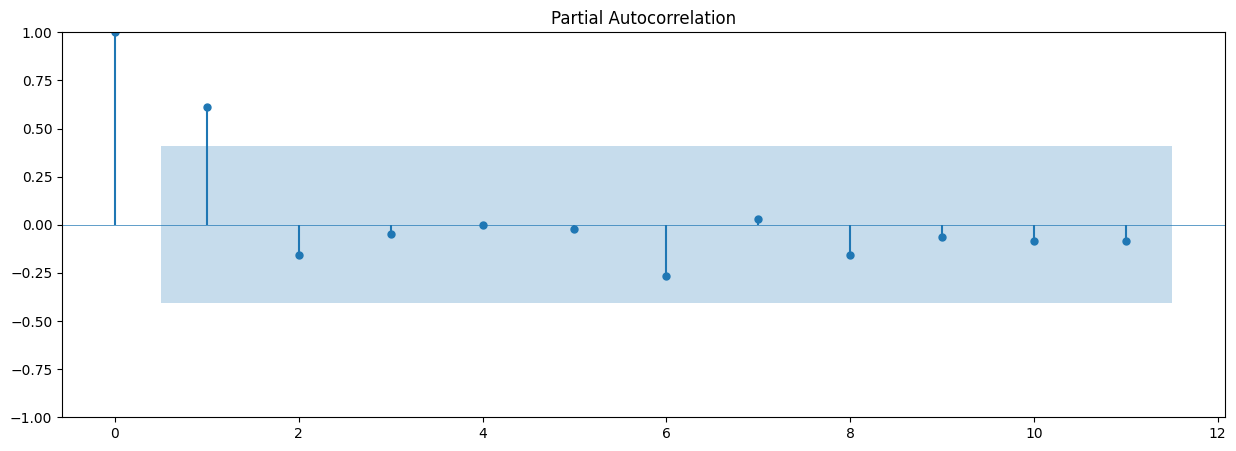

In [ ]:
# Resamplear los datos
dfhora = dftra.resample('H').mean()

# Número de lags
nlag = 11

# Autocorrelación y autocorrelación parcial para datos resampleados cada 1 hora
print("Autocorrelación para datos resampleados cada 1 hora:")
plot_acf(dfhora['precio_bid'].dropna(), lags=21, linewidth=0.5)  # Autocorrelación
plt.show()

plot_pacf(dfhora['precio_bid'].dropna(), lags=nlag, linewidth=0.5)  # Autocorrelación parcial
plt.show()


## Análisis de gráficas de autocorrelación y autocorrelación parcial

**Definición dada escrito anteriormente mencionado:**

"La autocorrelación refleja el grado de dependencia lineal entre los valores de una serie temporal en un índice específico y los valores de la serie temporal en índices desplazados por \( t-k \) o \( t+k \)."

---

Después de observar estas gráficas, se nota que en los intervalos no se presenta visualmente una estacionalidad clara, además de que se observan datos fuera de la banda de confianza. Se procederá a realizar una prueba para comprobar esto.


## **Método Análitico (Prueba  Dickey Fuller aumentada ADF)**

Es una prueba de raíz única que detecta estadísticamente la presencia de conducta tendencial estocástica en las series temporales de las variables mediante un contraste de hipótesis.


En presencia de una autocorrelación, es necesario diferenciar la serie del precio de cierre de Binance. por tal motivo las hipótesis a plantear son:

 **H0 : ρ =0** La serie tiene una raíz unitaria y no es estacionaria.

 **H1 : ρ <0** La serie no tiene una raíz unitaria y es estacionaria.

En otras palabras, la hipótesis nula es la presencia de la raíz unitaria o la no estacionariedad mientras que la hipótesis alternativa sugiere la estacionariedad de los datos.

$creditos \text{ } a \text{ } Profesora: \text{ } Keyla
 \text{ } Alba \text{ } por \text{ } por \text{ } la \text{ } informacion $

In [ ]:
# Prueba ADF para la serie resampleada a 5 minutos
adf_result_5min = adfuller(df5min['precio_bid'].dropna())
print('Resample 5 Minutos')
print('ADF Statistic: %f' % adf_result_5min[0])
print('p-value: %f' % adf_result_5min[1])
print()


Resample 5 Minutos
ADF Statistic: -2.416044
p-value: 0.137259



In [ ]:
# Prueba ADF para la serie resampleada a 30 minutos
adf_result_30min = adfuller(df30min['precio_bid'].dropna())
print('Resample 30 Minutos')
print('ADF Statistic: %f' % adf_result_30min[0])
print('p-value: %f' % adf_result_30min[1])
print()


Resample 30 Minutos
ADF Statistic: -2.193802
p-value: 0.208503



In [ ]:
# Prueba ADF para la serie resampleada por hora
adf_result_hora = adfuller(dfhora['precio_bid'].dropna())
print('Resample Por Hora')
print('ADF Statistic: %f' % adf_result_hora[0])
print('p-value: %f' % adf_result_hora[1])
print()


Resample Por Hora
ADF Statistic: -2.251910
p-value: 0.187947



## Analisis de resultados:
Los resultados obtenidos son los siguientes:

- **Resample por Hora:**
  - Estadístico ADF: -2.251910
  - Valor p: 0.187947

- **Resample 30 Minutos:**
  - Estadístico ADF: -2.193802
  - Valor p: 0.208503

- **Resample 5 Minutos:**
  - Estadístico ADF: -2.416044
  - Valor p: 0.137259

En todos los casos, el valor p es superior al nivel de significancia 0.05, lo que sugiere que no se puede rechazar la hipótesis nula. Esto indica que la serie temporal no muestra evidencia suficiente para ser considerada estacionaria y podría contener una raíz unitaria.

# Aplicación de Diferenciación
Debido a los resultados anteriores, se aplicará este método para transformar una serie no estacionaria en una serie estacionaria.


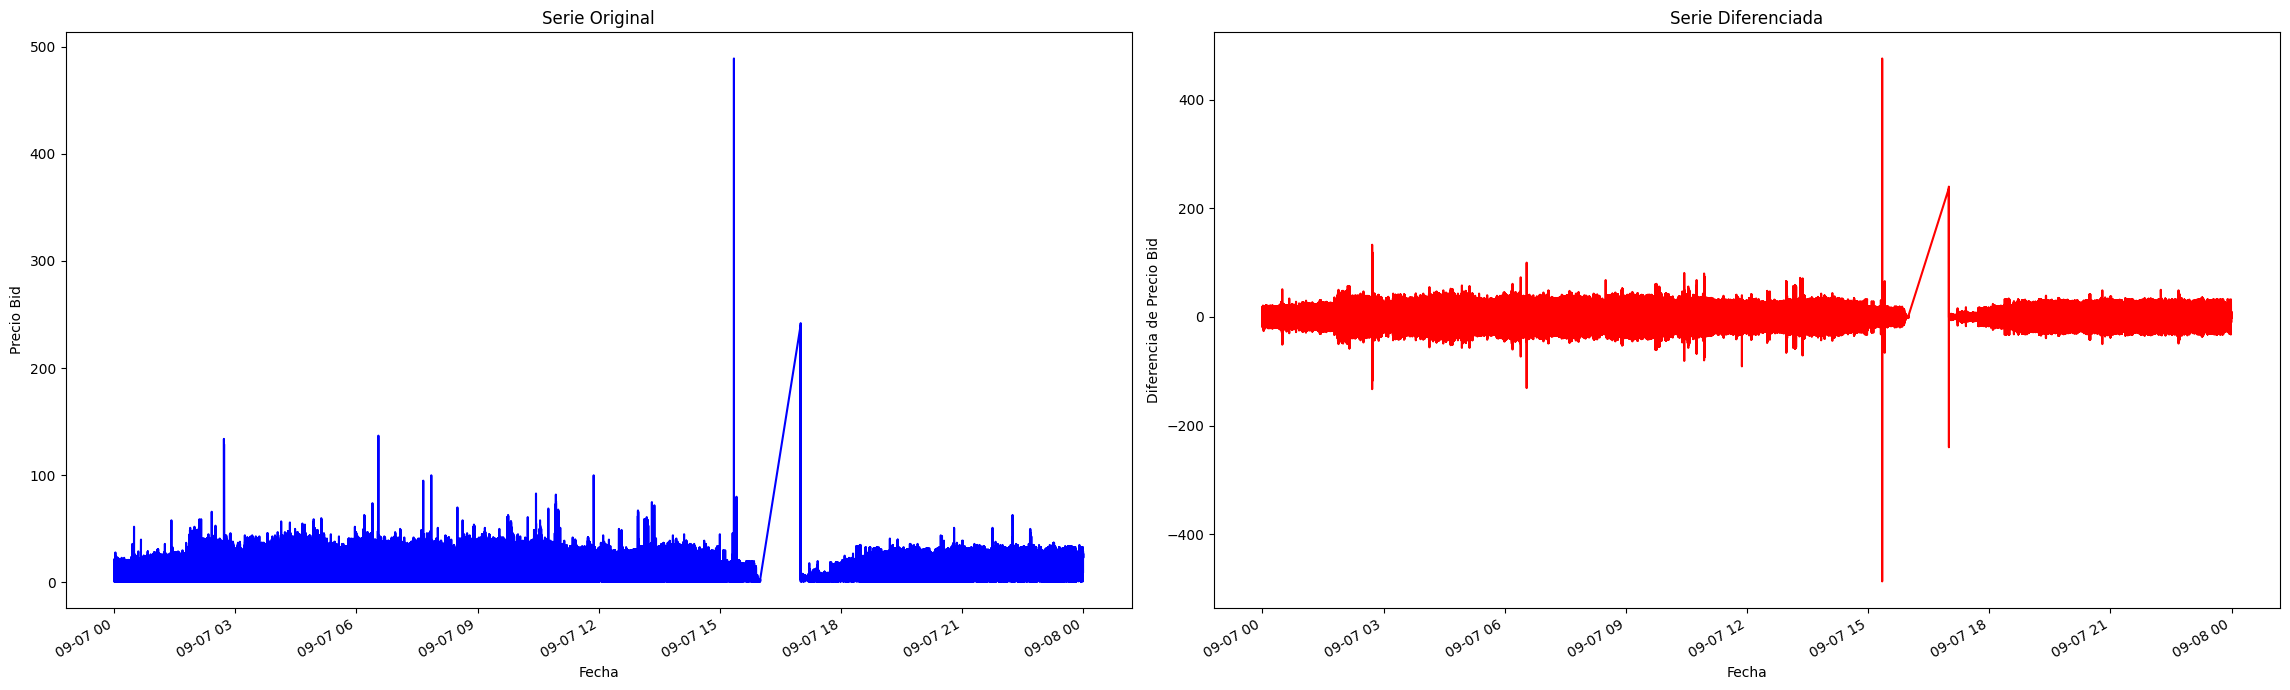

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df es tu DataFrame original
dftra['precio_bid_diff'] = dftra['precio_bid'].diff()

# Graficar la serie original y la diferenciada
plt.figure(figsize=(23, 7))

# Gráfico de la serie original
plt.subplot(1, 2, 1)
dftra['precio_bid'].plot(title='Serie Original', color='b')
plt.xlabel('Fecha')
plt.ylabel('Precio Bid')

# Gráfico de la serie diferenciada
plt.subplot(1, 2, 2)
dftra['precio_bid_diff'].plot(title='Serie Diferenciada', color='r')
plt.xlabel('Fecha')
plt.ylabel('Diferencia de Precio Bid')

plt.tight_layout()
plt.show()


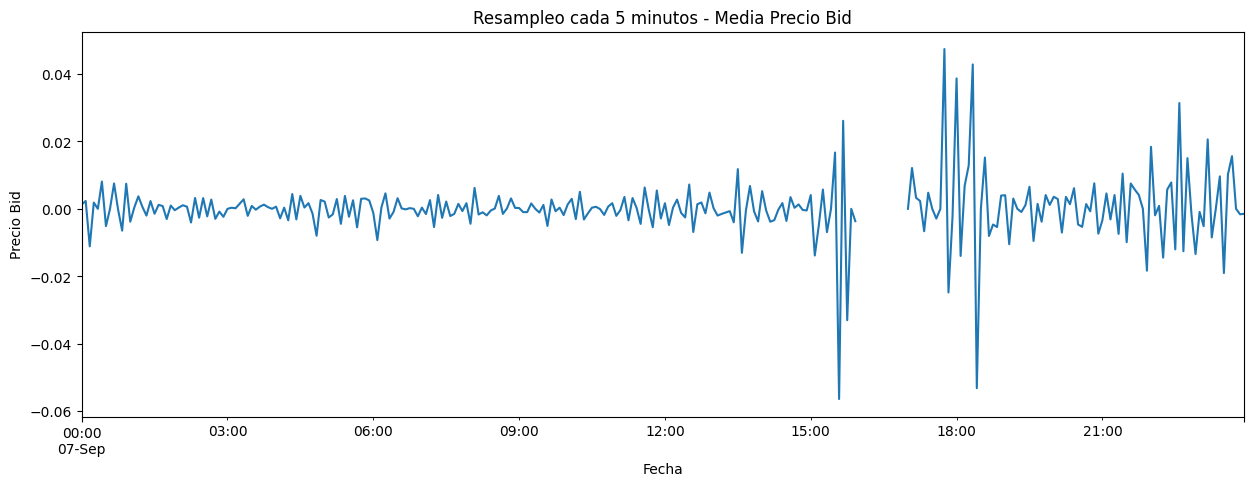

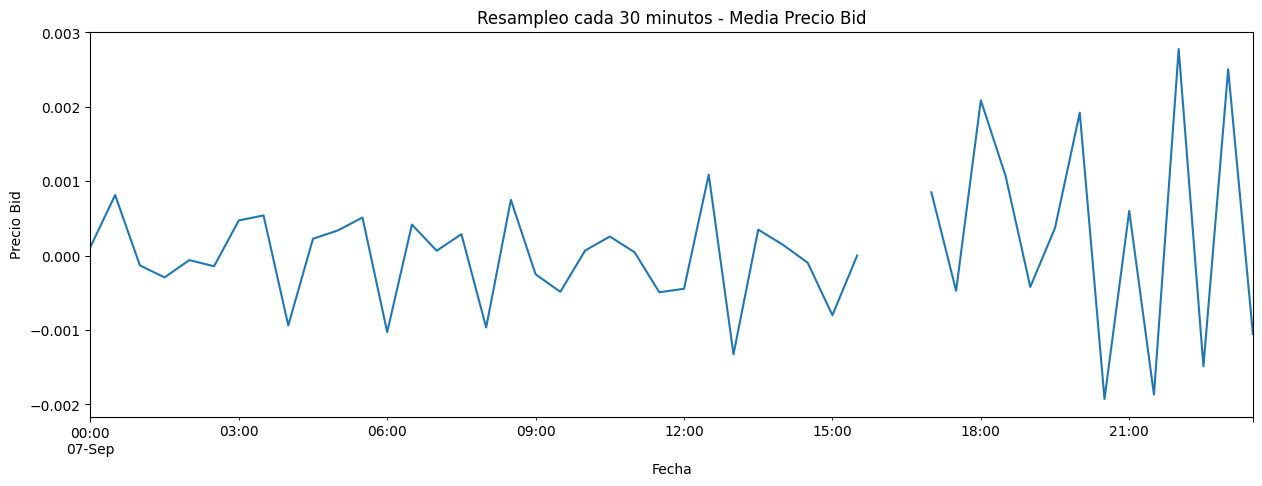

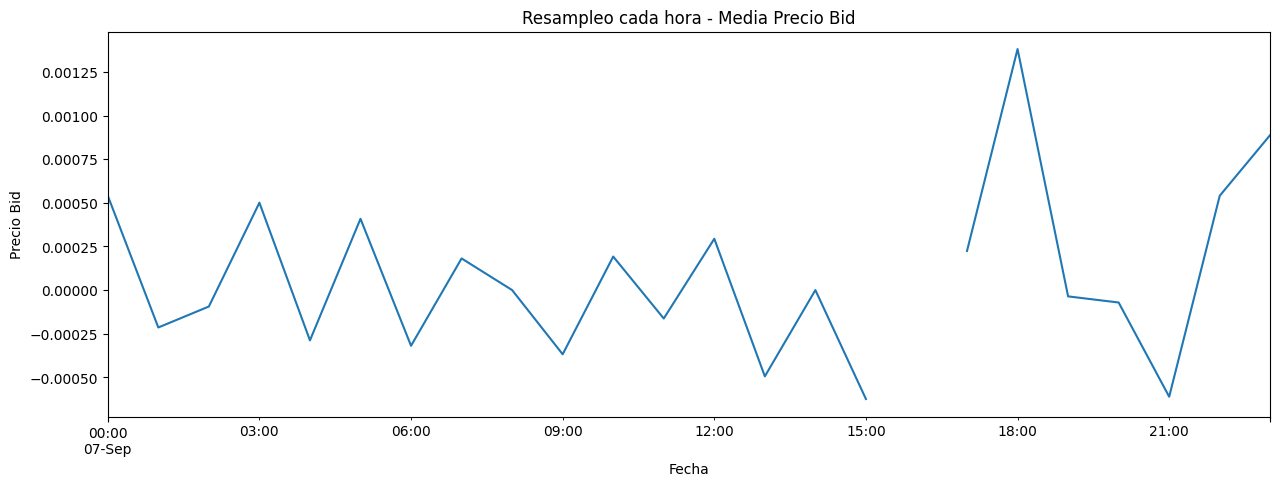

In [ ]:
# Resampleo cada 5 minutos: calculamos la media
df5min = dftra.resample('5T').mean()
# Resampleo cada 30 minutos: calculamos la media
df30min = dftra.resample('30T').mean()
# Resampleo cada hora: calculamos la media
dfhora = dftra.resample('H').mean()

# Graficamos las series resampleadas
def plot_resampled_data(df_resampled, title):
    df_resampled['precio_bid_diff'].plot(color='tab:blue')
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel('Precio Bid')
    plt.show()

plot_resampled_data(df5min, 'Resampleo cada 5 minutos - Media Precio Bid')
plot_resampled_data(df30min, 'Resampleo cada 30 minutos - Media Precio Bid')
plot_resampled_data(dfhora, 'Resampleo cada hora - Media Precio Bid')

## Análisis de Series
Después de haber aplicado la diferenciación, generamos estas gráficas para observar si nuestra serie ya es estacionaria. Visualmente, parece que solo fue necesaria una diferenciación.


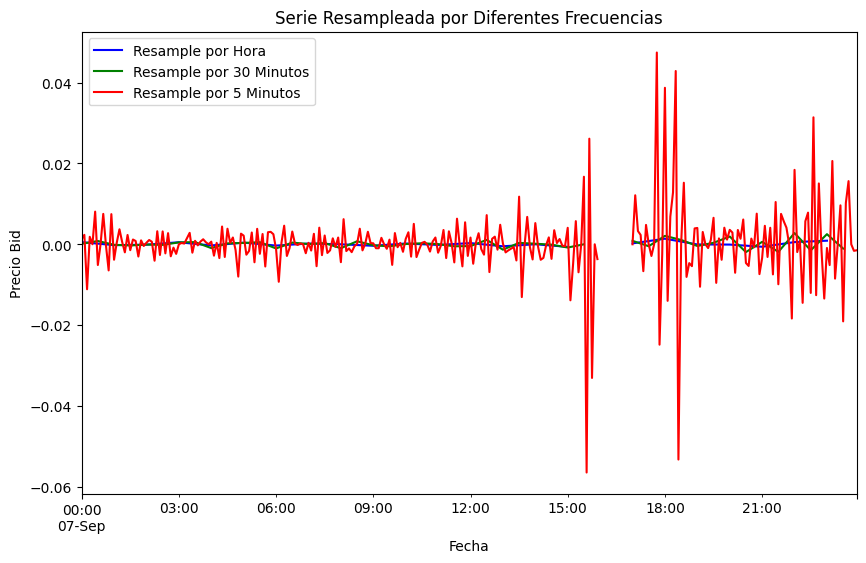

In [ ]:
# Paso 1: Resamplear la serie temporal a diferentes frecuencias
df_hora = dftra['precio_bid_diff'].resample('H').mean()  # Resampleo por hora
df_30min = dftra['precio_bid_diff'].resample('30T').mean()  # Resampleo cada 30 minutos
df_5min = dftra['precio_bid_diff'].resample('5T').mean()  # Resampleo cada 5 minutos

# Paso 2: Graficar la serie resampleada por diferentes frecuencias
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la serie resampleada por hora en azul
df_hora.plot(ax=ax, color='b', label='Resample por Hora')

# Graficar la serie resampleada por 30 minutos en verde
df_30min.plot(ax=ax, color='g', label='Resample por 30 Minutos')

# Graficar la serie resampleada por 5 minutos en rojo
df_5min.plot(ax=ax, color='r', label='Resample por 5 Minutos')

# Configurar etiquetas y título
ax.set_title('Serie Resampleada por Diferentes Frecuencias')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio Bid')
plt.legend()
plt.show()

Aquí observamos las gráficas de la serie ya diferenciada y resampleada, con las características mencionadas anteriormente, pero ahora con una aparente estacionariedad visual.


# Autocorrelación y Autocorrelación Parcial
Despues de realizar la diferenciacion.

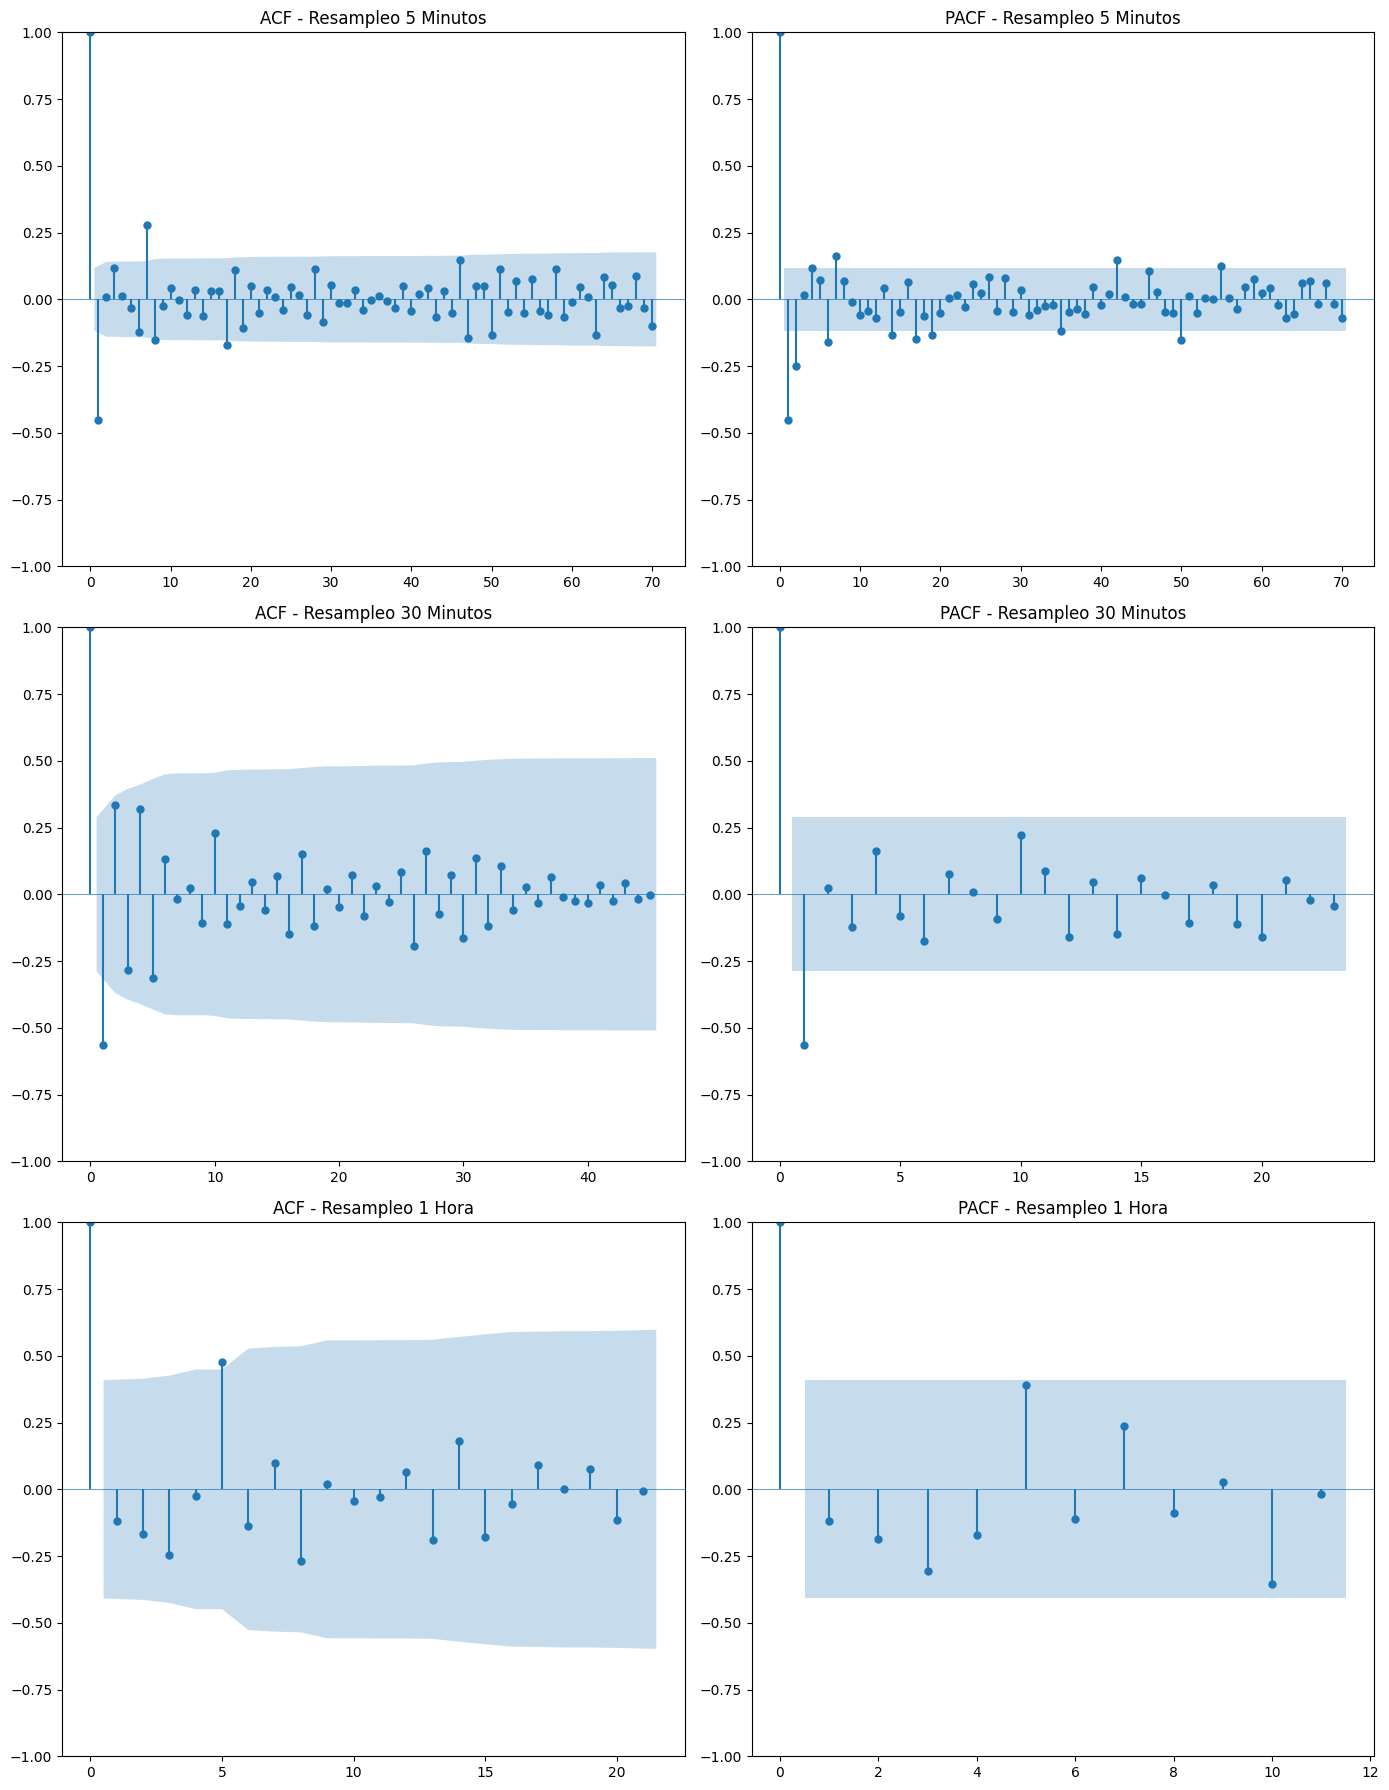

In [ ]:
df5min = dftra.resample('5T').mean()
df30min = dftra.resample('30T').mean()
dfhora = dftra.resample('H').mean()

nlag_5min = 70
nlag_30min = 23
nlag_hora = 11

fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Gráficas para resampleo cada 5 minutos
plot_acf(df5min['precio_bid_diff'].dropna(), lags=nlag_5min, ax=axes[0, 0], linewidth=0.5)
axes[0, 0].set_title("ACF - Resampleo 5 Minutos")
plot_pacf(df5min['precio_bid_diff'].dropna(), lags=nlag_5min, ax=axes[0, 1], linewidth=0.5)
axes[0, 1].set_title("PACF - Resampleo 5 Minutos")

# Gráficas para resampleo cada 30 minutos
plot_acf(df30min['precio_bid_diff'].dropna(), lags=45, ax=axes[1, 0], linewidth=0.5)
axes[1, 0].set_title("ACF - Resampleo 30 Minutos")
plot_pacf(df30min['precio_bid_diff'].dropna(), lags=nlag_30min, ax=axes[1, 1], linewidth=0.5)
axes[1, 1].set_title("PACF - Resampleo 30 Minutos")

# Gráficas para resampleo cada 1 hora
plot_acf(dfhora['precio_bid_diff'].dropna(), lags=21, ax=axes[2, 0], linewidth=0.5)
axes[2, 0].set_title("ACF - Resampleo 1 Hora")
plot_pacf(dfhora['precio_bid_diff'].dropna(), lags=nlag_hora, ax=axes[2, 1], linewidth=0.5)
axes[2, 1].set_title("PACF - Resampleo 1 Hora")

plt.tight_layout()
plt.show()


Después de observar la autocorrelación y la autocorrelación parcial, se nota visualmente un cambio con respecto al análisis anterior, ya que aquí se logra evidenciar la estacionalidad.


## **Método Analítico (Prueba Dickey-Fuller Aumentada - ADF)**
Después de aplicar una diferenciación.

**Planteamiento de Hipótesis:**
- **H0: ρ = 0** La serie tiene una raíz unitaria y no es estacionaria.
- **H1: ρ < 0** La serie no tiene una raíz unitaria y es estacionaria.


In [ ]:
# Prueba ADF para la serie resampleada a 5 minutos
adf_result_5min = adfuller(df5min['precio_bid_diff'].dropna())
print('Resample 5 Minutos')
print('ADF Statistic: %f' % adf_result_5min[0])
print('p-value: %f' % adf_result_5min[1])
print()


Resample 5 Minutos
ADF Statistic: -5.684171
p-value: 0.000001



In [ ]:
# Prueba ADF para la serie resampleada a 30 minutos
adf_result_30min = adfuller(df30min['precio_bid_diff'].dropna())
print('Resample 30 Minutos')
print('ADF Statistic: %f' % adf_result_30min[0])
print('p-value: %f' % adf_result_30min[1])
print()

Resample 30 Minutos
ADF Statistic: -12.487952
p-value: 0.000000



In [ ]:
# Prueba ADF para la serie resampleada por hora
adf_result_hora = adfuller(dfhora['precio_bid_diff'].dropna())
print('Resample Por Hora')
print('ADF Statistic: %f' % adf_result_hora[0])
print('p-value: %f' % adf_result_hora[1])
print()

Resample Por Hora
ADF Statistic: -1.384520
p-value: 0.589675



## Análisis de Resultados:
Los resultados obtenidos son los siguientes:

- **Resample 5 Minutos:**
  - Estadístico ADF: -5.684171
  - Valor p: 0.000001

- **Resample 30 Minutos:**
  - Estadístico ADF: -12.487952
  - Valor p: 0.000000

- **Resample por Hora:**
  - Estadístico ADF: -1.384520
  - Valor p: 0.589675

### Resultados:

- **Resample 5 Minutos** y **Resample 30 Minutos**:
  En ambos casos, los valores p son significativamente menores que 0.05, lo que nos permite rechazar la hipótesis nula de raíz unitaria. Esto indica que la serie temporal diferenciada es estacionaria a estos intervalos de tiempo. Los valores del estadístico ADF son negativos y grandes en magnitud, lo que refuerza la evidencia de que las series no tienen una raíz unitaria.

- **Resample por Hora**:
  En este caso, el valor p es mayor que 0.05, lo que sugiere que no se puede rechazar la hipótesis nula. Esto indica que la serie temporal diferenciada no es estacionaria cuando se resamplea a intervalos de una hora.
